In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from entropy_splitter import EntropySplitter

In [31]:
features = 'times_pregnant plasma blood_pressure skin_thickness insulin mass_idx pedigree age'.split()
dataset_path = 'data/pima-indians-diabetes.csv'
classifier = MultinomialNB()


In [27]:
def get_features_and_labels(dataset, feature_names):
    return dataset[feature_names], dataset['class']

In [30]:
def get_cv_score_for_classifier(X, y, clf):
    return np.mean(cross_val_score(clf, X, y, scoring='f1_micro', n_jobs=-1))

### Entropy based

In [95]:
dataset = pd.read_csv(dataset_path, skiprows=9)

for feature in features:
    splitter = EntropySplitter(gain_threshold=0.015)
    splits = splitter.get_splits(dataset[feature], dataset['class'])
    
    if len(splits) > 0:
        dataset[feature] = np.digitize(dataset[feature], splits)

X, y = get_features_and_labels(dataset, features)
entropy_best = get_cv_score_for_classifier(X, y, classifier)

display(entropy_best)

0.73833970318023445

###  Equal-width

In [22]:
def bin_data(data, number_of_bins):
    bins = np.linspace(np.min(data), np.max(data), number_of_bins)
    return np.digitize(data, bins)

In [145]:
scores = []

for i in range(1, 40):
    dataset = pd.read_csv(dataset_path, skiprows=9)

    for feature in features:
        dataset[feature] = bin_data(dataset[feature], i)

    X, y = get_features_and_labels(dataset, features)
    score = get_cv_score_for_classifier(X, y, classifier)
    
    scores.append(score)

0.67576299083187108

19

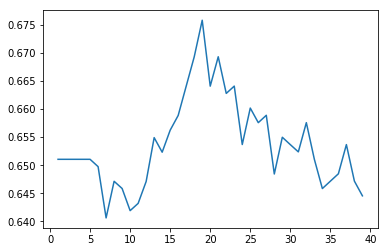

In [146]:
plt.plot(range(1,40), scores)

width_best = max(scores)
index = scores.index(width_best)

display(width_best, index + 1)

###  Equal-depth

In [147]:
scores = []

for i in range(1, 40):
    dataset = pd.read_csv(dataset_path, skiprows=9)
    
    for feature in features: 
        dataset[feature] = pd.qcut(dataset[feature].rank(method='first'), i, labels=False)

    X, y = get_features_and_labels(dataset, features)
    score = get_cv_score_for_classifier(X, y, classifier)
    
    scores.append(score)

0.69803559961598127

10

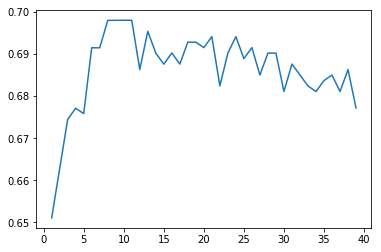

In [148]:
plt.plot(range(1, 40), scores)

depth_best = max(scores)
index = scores.index(depth_best)

display(depth_best, index + 1)

### Gaussian

In [140]:
dataset = pd.read_csv(dataset_path, skiprows=9)

X, y = get_features_and_labels(dataset, features)
gaussian_score = get_cv_score_for_classifier(X, y, GaussianNB())

display(gaussian_score)

0.74354308925256218

### Multinomial


In [149]:
dataset = pd.read_csv(dataset_path, skiprows=9)

X, y = get_features_and_labels(dataset, features)
multinomial_score = get_cv_score_for_classifier(X, y, MultinomialNB())

display(multinomial_score)

0.59365949890007885

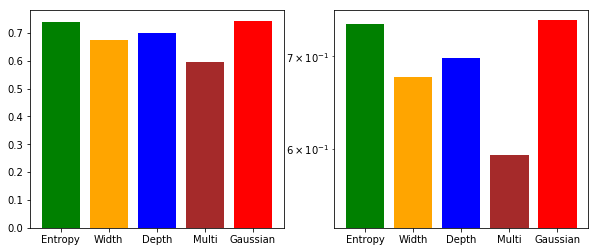

In [150]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

scores = [entropy_best, width_best, depth_best, multinomial_score, gaussian_score]
labels = ['Entropy', 'Width', 'Depth', 'Multi', 'Gaussian']
bar_colors = ['green', 'orange', 'blue', 'brown', 'red']

ax1.bar(range(len(scores)), scores, color=bar_colors)
ticks = ax1.set_xticks(range(len(scores)))
labels = ax1.set_xticklabels(labels)

ax2.bar(range(len(scores)), scores, color=bar_colors, log=True)
ticks = ax2.set_xticks(range(len(scores)))
labels = ax2.set_xticklabels(labels)

In [151]:
entropy_best - multinomial_score

0.1446802042801556